<a href="https://colab.research.google.com/github/SodisettiRakesh123/hanuman-/blob/main/Copy_of_water_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split # Changed 'trian_test_split' to 'train_test_split'
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier from sklearn.tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
df=pd.read_csv('/content/archive (6).zip')

In [9]:
df.shape

(3276, 10)

In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


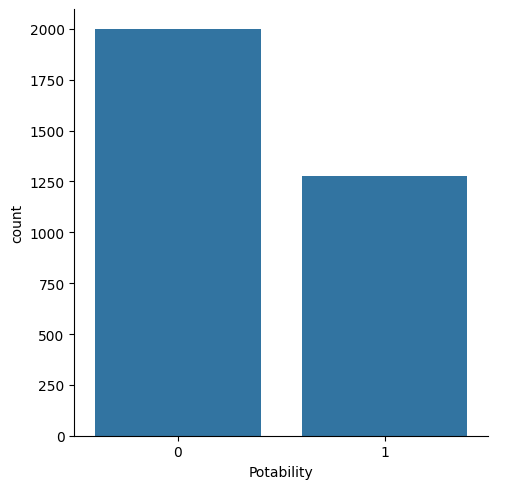

In [13]:
sns.catplot(x='Potability',data=df,kind = 'count')

<Axes: xlabel='Potability', ylabel='ph'>

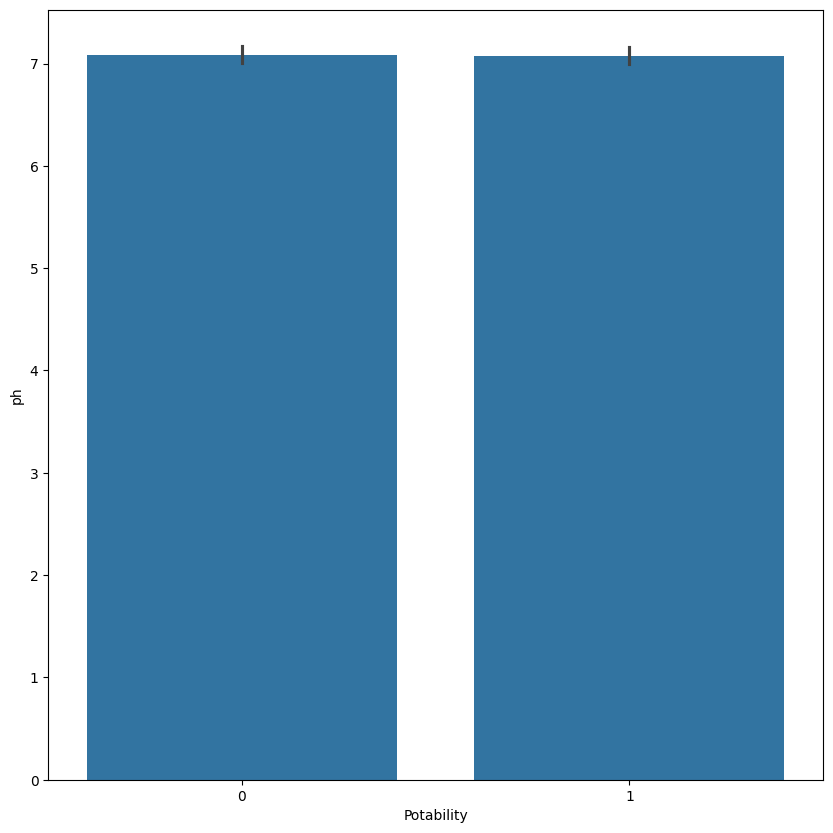

In [14]:
plot=plt.figure(figsize=(10,10))
# Check if the column name is 'ph' instead of 'Ph'
sns.barplot(x='Potability',y='ph',data=df)

<Axes: xlabel='Potability', ylabel='Hardness'>

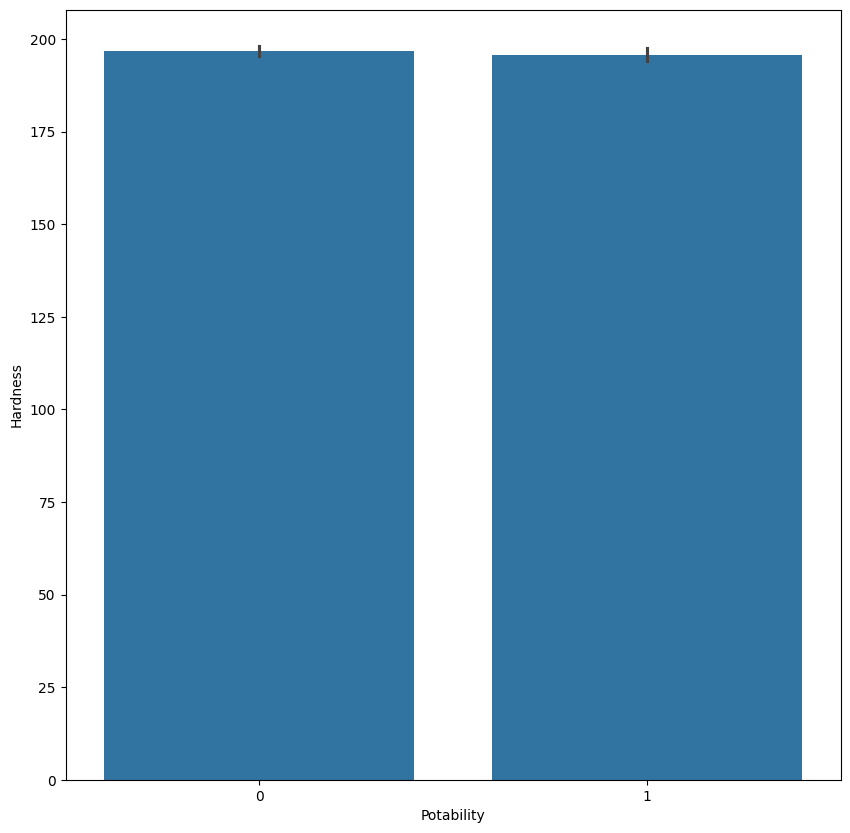

In [15]:
plot=plt.figure(figsize=(10,10))
# Check if the column name is 'ph' instead of 'Ph'
sns.barplot(x='Potability',y='Hardness',data=df)

In [16]:
correlation=df.corr()

<Axes: >

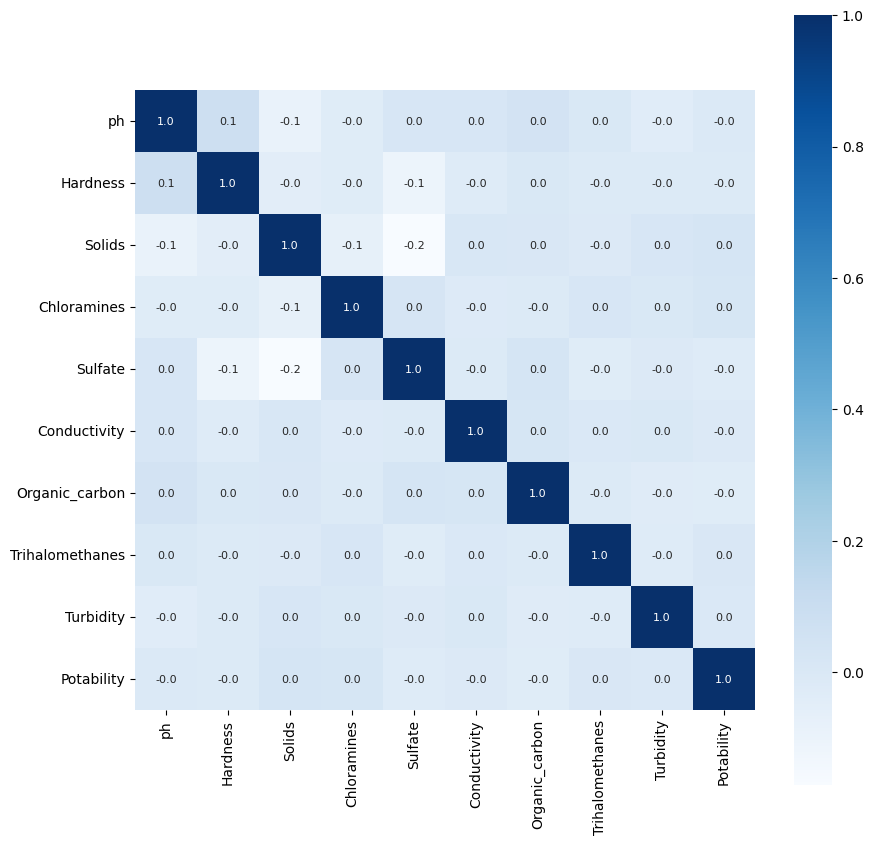

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [18]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [19]:
print(x)

            ph    Hardness  ...  Trihalomethanes  Turbidity
0          NaN  204.890455  ...        86.990970   2.963135
1     3.716080  129.422921  ...        56.329076   4.500656
2     8.099124  224.236259  ...        66.420093   3.055934
3     8.316766  214.373394  ...       100.341674   4.628771
4     9.092223  181.101509  ...        31.997993   4.075075
...        ...         ...  ...              ...        ...
3271  4.668102  193.681735  ...        66.687695   4.435821
3272  7.808856  193.553212  ...              NaN   2.798243
3273  9.419510  175.762646  ...        69.845400   3.298875
3274  5.126763  230.603758  ...        77.488213   4.708658
3275  7.874671  195.102299  ...        78.698446   2.309149

[3276 rows x 9 columns]


In [20]:
y=df['Potability'].apply(lambda y_value:1 if y_value>0 else 0)

In [21]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(3276, 9) (2620, 9) (656, 9)


In [25]:
model=DecisionTreeClassifier()

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [28]:
print(accuracy_score(x_test_prediction,y_test))

0.5960365853658537


In [29]:
input_data=(8.544708662,181.4134021,31429.37903,7.55502971,350.3970819,393.8896156,10.24723219,82.72191192,2.31815248)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
  print('Water is not Potable')
else:
  print('Water is Potable')

[1]
Water is not Potable
